In [14]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
#query_var_pipeline='varscan_dr'


query_var_pipeline='varscan_dr'

tcgaOrignalVCFDir='./../Data/TCGA_VCF.pickle'
inDir=tcgaOrignalVCFDir.replace('.pickle',
                          '.{}.pickle'.format(query_var_pipeline)
                         )
mergedDf_all=pd.read_pickle(inDir)

In [23]:
#mergedDf_all

In [19]:
mergedDf_all.head()

Group                                                       one_vcf_df        \
VCF_columns                                                      index CHROM   
TUMOR                        NORMAL                                            
TCGA-DU-5870-01A-11D-1705-08 TCGA-DU-5870-10A-01D-1705-08 0          0  chr1   
                                                          1          1  chr1   
                                                          2          2  chr1   
                                                          3          3  chr1   
                                                          4          4  chr1   

Group                                                                        \
VCF_columns                                                      POS ID REF   
TUMOR                        NORMAL                                           
TCGA-DU-5870-01A-11D-1705-08 TCGA-DU-5870-10A-01D-1705-08 0   944131  .   A   
                                                          1   944136  .   T   
                                                          2  1300684  .   C   
                                                          3  1713611  .   C   
                                                          4  1713674  .   T   

Group                                                                        \
VCF_columns                                                 ALT QUAL FILTER   
TUMOR                        NORMAL                                           
TCGA-DU-5870-01A-11D-1705-08 TCGA-DU-5870-10A-01D-1705-08 0   C    .   PASS   
                                                          1   C    .   PASS   
                                                          2   A    .   PASS   
                                                          3   T    .   PASS   
                                                          4   C    .   PASS   

Group                                                                                                         \
VCF_columns                                                                                             INFO   
TUMOR                        NORMAL                                                                            
TCGA-DU-5870-01A-11D-1705-08 TCGA-DU-5870-10A-01D-1705-08 0  DP=89;GPV=1E0;SOMATIC;SPV=5.0789E-2;SS=2;SSC=12   
                                                          1  DP=92;GPV=1E0;SOMATIC;SPV=1.8932E-2;SS=2;SSC=17   
                                                          2  DP=71;GPV=1E0;SOMATIC;SPV=6.3354E-2;SS=2;SSC=11   
                                                          3  DP=59;GPV=1E0;SOMATIC;SPV=4.5001E-3;SS=2;SSC=23   
                                                          4   DP=42;GPV=1E0;SOMATIC;SPV=3.252E-2;SS=2;SSC=14   

Group                                                                                 \
VCF_columns                                                                   FORMAT   
TUMOR                        NORMAL                                                    
TCGA-DU-5870-01A-11D-1705-08 TCGA-DU-5870-10A-01D-1705-08 0  GT:GQ:DP:RD:AD:FREQ:DP4   
                                                          1  GT:GQ:DP:RD:AD:FREQ:DP4   
                                                          2  GT:GQ:DP:RD:AD:FREQ:DP4   
                                                          3  GT:GQ:DP:RD:AD:FREQ:DP4   
                                                          4  GT:GQ:DP:RD:AD:FREQ:DP4   

Group                                                       ... normal_df      \
VCF_columns                                                 ...        DP  RD   
TUMOR                        NORMAL                         ...                 
TCGA-DU-5870-01A-11D-1705-08 TCGA-DU-5870-10A-01D-1705-08 0 ...        20  18   
                                                          1 ...        25  22   
                                                          2 ...        18  16   
     

In [20]:
statDf=pd.DataFrame({'tumor_freq':mergedDf_all['tumor_df']['FREQ'].str.replace('%','').astype(float),
'normal_freq':mergedDf_all['normal_df']['FREQ'].str.replace('%','').astype(float),
 'SPV':(mergedDf_all['INFO']['SPV'].astype(float))})

In [21]:
statDf['-log10_SPV']=-np.log10(statDf['SPV'])

In [6]:
statDf['DP']=mergedDf_all['INFO']['DP'].astype(float)

In [7]:
#mergedDf_all['INFO']['DP']

In [8]:
statDf['freq_diff']=(statDf['tumor_freq']-statDf['normal_freq']).abs()

In [9]:
#statDf.loc['TCGA-DU-5870-01A-11D-1705-08'].corr()

In [10]:
statDf['tumor_rd']=np.multiply(statDf['DP'],statDf['tumor_freq'])
statDf['normal_rd']=np.multiply(statDf['DP'],statDf['normal_freq'])

statDf['alt_allele_count']=np.log2(statDf['tumor_rd']+1)-np.log2(statDf['normal_rd']+1)

In [11]:
statDf.loc['TCGA-DU-5870-01A-11D-1705-08'].corr().loc['-log10_SPV'].sort_values()

SPV                -0.501005
alt_allele_count   -0.221508
tumor_freq         -0.109319
tumor_rd           -0.056705
normal_freq         0.306143
freq_diff           0.310186
DP                  0.339228
normal_rd           0.891465
-log10_SPV          1.000000
Name: -log10_SPV, dtype: float64

In [ ]:
### do an exact fisher test for the mutation, 
#statDf
statDf

In [ ]:
sns.jointplot(data=statDf,y='-log10_SPV',x='DP')

TypeError: can't multiply sequence by non-int of type 'float'

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


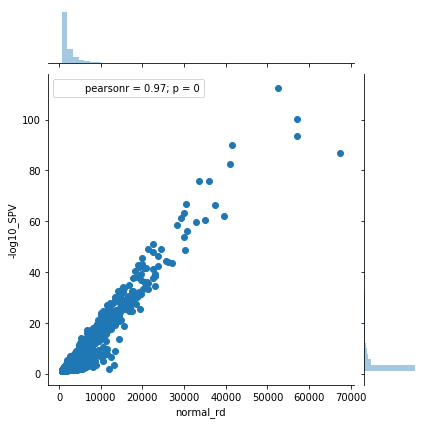

In [108]:
sns.jointplot(data=statDf,y='-log10_SPV',x='normal_rd')

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


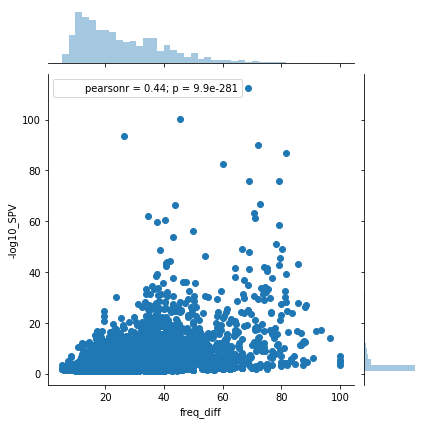

In [109]:
sns.jointplot(data=statDf,y='-log10_SPV',x='freq_diff')

In [67]:
#Driven by allelic fraction
statDf

tumor_freq  \
TUMOR                        NORMAL                                         
TCGA-DU-5870-01A-11D-1705-08 TCGA-DU-5870-10A-01D-1705-08 0          0.00   
                                                          1          0.00   
                                                          2          0.00   
                                                          3          4.44   
                                                          4          0.00   
                                                          5          0.00   
                                                          6          0.00   
                                                          7          0.00   
                                                          8          0.00   
                                                          9          3.94   
                                                          10         2.02   
                                                          11         0.00   
                                                          12         0.00   
                                                          13         0.00   
                                                          14         0.00   
                                                          15         1.20   
                                                          16         0.00   
                                                          17         0.00   
                                                          18         0.00   
                                                          19         0.00   
                                                          20         3.45   
                                                          21         4.76   
                                                          22         4.97   
                                                          23         0.00   
                                                          24         0.00   
                                                          25         3.70   
                                                          26         0.00   
                                                          27         0.00   
                                                          28         0.00   
                                                          29         0.00   
...                                                                   ...   
TCGA-DH-A669-02A-11D-A31L-08 TCGA-DH-A669-10A-01D-A31J-08 453        5.00   
                                                          454        0.00   
                                                          455        4.55   
                                                          456        0.00   
                                                          457        0.00   
                                                          458        3.57   
                                                          459        0.00   
                                                          460        0.00   
                                                          461        0.00   
                                                          462        3.57   
                                                          463        4.17   
                                                          464        2.56   
                                                          465        2.56   
                                                          466        2.63   
                                                          467        2.63   
                                                          468        0.00   
                                                          469        3.03   
                                                          470        1.32   
                                                          471        3.33   
                                                          4